In [21]:
import geopandas as gpd
import random
import folium

from bikescience.grid import Grid

In [2]:
facilities = gpd.read_file('../data/boston/bike-facilities-2018-04/BostonBikeFacilities-2018-04t.shp')
print(len(facilities))
print(facilities.crs)
facilities.head()

21492
{'init': 'epsg:26986'}


OBJECTID  bike_id  roadseg_id local_name prop_name reg_name reg_ll_typ  \
0         1        1      349256       None      None     None       None   
1         2        7       12601       None      None     None       None   
2         3        8      112253       None      None     None       None   
3         4        9      316649       None      None     None       None   
4         5       14      316650       None      None     None       None   

   fac_stat  fac_type  fac_detail  ...  open_date  datasource   length_ft  \
0         1         9           0  ...       None        None  102.542574   
1         1         9           0  ...       None        None  142.801696   
2         3         1           0  ...       None        None   84.709995   
3         3         1           0  ...       None        None  219.912358   
4         3         1           0  ...       None        None  476.143960   

  muni_id created_us  created_da  last_edite  last_edi_1  shape_Leng  \
0     274       None        None        MAPC  2016-11-29   31.255039   
1      10       None        None        MAPC  2016-11-29   43.526044   
2      73       None        None        MAPC  2016-11-29   25.819658   
3     243       None        None        MAPC  2016-11-29   67.029421   
4     243       None        None        MAPC  2016-11-29  145.128969   

                                            geometry  
0  LINESTRING (230831.7030000016 906232.312600001...  
1  LINESTRING (227465.4376000017 907610.562300000...  
2  LINESTRING (225221.5521000028 889756.6195, 225...  
3  LINESTRING (239752.2625999972 890773.395199999...  
4  LINESTRING (239752.2625999972 890773.395199999...  

[5 rows x 23 columns]

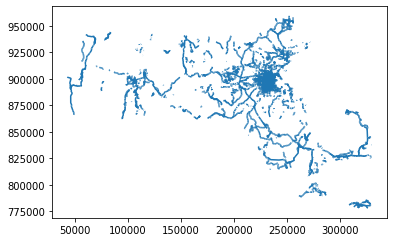

In [4]:
facilities.plot()

In [6]:
facilities.loc[0]

OBJECTID                                                      1
bike_id                                                       1
roadseg_id                                               349256
local_name                                                 None
prop_name                                                  None
reg_name                                                   None
reg_ll_typ                                                 None
fac_stat                                                      1
fac_type                                                      9
fac_detail                                                    0
fac_width                                                     0
surf_type                                                     0
steward                                                    None
open_date                                                  None
datasource                                                 None
length_ft                               

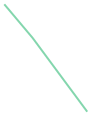

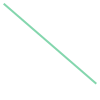

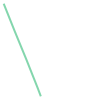

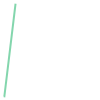

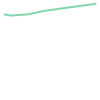

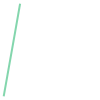

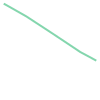

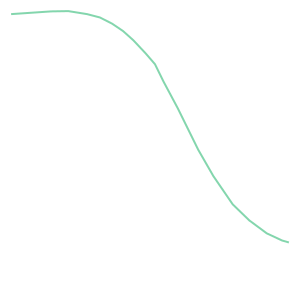

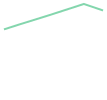

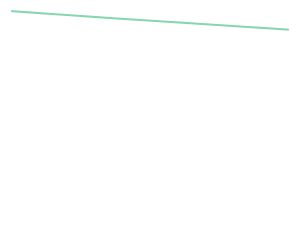

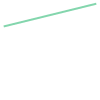

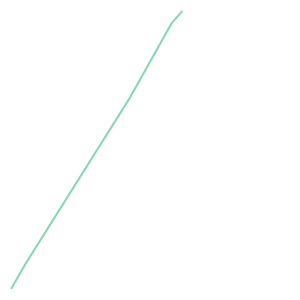

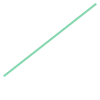

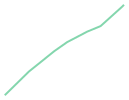

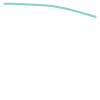

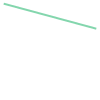

In [23]:
per_bike = facilities.dissolve(by='bike_id')
for i in range(20):
    idx = random.randrange(len(per_bike.index))
    display(per_bike.geometry[per_bike.index[idx]])

In [27]:
samples = per_bike.sample(n=100)
samples.to_crs({'init': 'epsg:4326'}, inplace=True)
fmap = Grid().map_around(plot_grid=False)
folium.GeoJson(samples.to_json()).add_to(fmap)
fmap